# Simple API example

## Resources
* Get your API [access tokens](https://apps.twitter.com)
* Read the tweepy [docs](https://tweepy.readthedocs.io/en/v3.6.0/getting_started.html)
* Read the Twitter developer [docs](https://developer.twitter.com/en/use-cases/analyze)
* Anticipate a tweepy error for [Python 3.7 and fix it](https://github.com/tweepy/tweepy/issues/1017)

This is a modified example from the DataCamp Importing Data Into Python Part 2 course by Hugo Bowne-Anderson.

In [ ]:
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import re

## Authentication
Get your API access tokens from your Twitter account. Store them in variables and do not make them public. Some people make the mistake of doing a git commit on a version of their code with the tokens exposed. Don't do that.

In [4]:
# Store OAuth authentication credentials
access_token = "XXXX"
access_token_secret = "XXXX"
consumer_key = "XXXX"
consumer_secret = "XXXX"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

## Capturing the data
Create your local listener class.

In [16]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api = None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file_name = "tweets.txt"

    def on_status(self, status):
        tweet = status._json
        with open(self.file_name, 'a') as file:
            file.write(json.dumps(tweet) + '\n')
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False

    def on_error(self, status):
        print(status)

Use the streamlistener and the inherited filter method to pick out incoming tweets with your search terms. This code originated in 2016, thus the search terms.

In [17]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

## Ingesting & extracting the data

In [30]:
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict and verify the number of tweets captured
print(tweets_data[0].keys())
print(len(tweets_data))

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])
101


In [20]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @fodasemeuamigo: o brasileiro foi do ceu ao...   pt
1  @time_detective @KyleKulinski Yes, on one hand...   en
2  RT @RyanAFournier: For the first time in Unite...   en
3  RT @mitchellvii: Trump has so many powerful en...   en
4  @slowdangles23 @BillKristol Criticizing FOX ye...   en


## Analysis

Keeping it simple, let's count the occurances of each of the terms.

In [26]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [27]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    
print([clinton, trump, sanders, cruz])

## Visualization

As of 2018.10.17 at about 11:00 (AM) and a tiny sample size, Sanders is, Twitterly-speaking, non-existent.

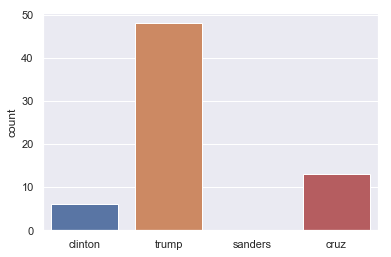

In [29]:
# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()